## Ridge & Lasso Regression
Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import load_diabetes  # scikit-learn 에서 diabetes data 불러오기
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [17]:
# alpha 변수에 10^(-3)부터 10^1 사이의 수 5개를 넣는다. 
# numpy logspace 함수 : Return numbers spaced evenly on a log scale
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y) # Ridge Regression fitting
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_]))) # 상관계수와 intercept 값 추출
                                                                                                            # numpy hstack 함수 : Stack arrays in sequence horizontally (column wise)
    
df_ridge = pd.DataFrame(data, index=alpha).T # Transpose
df_ridge

,0.001,0.01,0.1,1.0,10.0
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [18]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y) # Lasso Regression fitting
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.01,0.1,1.0,10.0
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


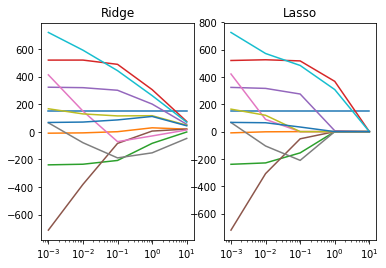

In [19]:
# Ridge Regression
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T) # semilogx 함수 : 데이터를 x축에 대한 로그 스케일로 플로팅
plt.xticks(alpha) # x축 alpha 값으로 결정
plt.title("Ridge")

#Lasso Regression
ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")

plt.show()